In [1]:
### importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns


In [3]:
df=pd.read_csv("C:/Users/ELCOT/Desktop/abc/salestimeseries.csv")

In [4]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [5]:
df.columns=["month","sales"]

In [10]:
df.dropna(inplace=True)                             ###droping missing values

In [11]:
df.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df["month"]=pd.to_datetime(df["month"])

In [14]:
df.dtypes

month    datetime64[ns]
sales           float64
dtype: object

In [15]:
df.set_index("month",inplace=True)

In [16]:
df

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


<AxesSubplot:xlabel='month'>

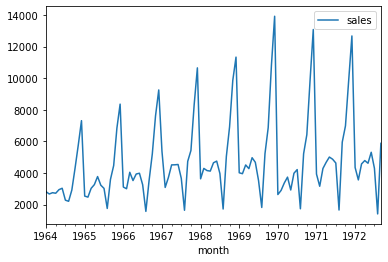

In [17]:
df.plot()

In [19]:
###checking for stationary or not
from statsmodels.tsa.stattools import adfuller

In [22]:
###ho:its not stationary H1:its a stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels=["adf test stat","pvalue","lags used","no of observations"]
    for i,k in zip(result,labels):
        print(k +" ...."+str(i))
    if result[1]<0.05:
        print("its a stationary")
    else:
        print("it is not a stationary")
        

In [23]:
adfuller_test(df["sales"])

adf test stat ....-1.8335930563276188
pvalue ....0.363915771660247
lags used ....11
no of observations ....93
it is not a stationary


In [28]:
####conversion into the stationary
df["seasonalsales"]=df["sales"]-df["sales"].shift(12)

In [30]:
df

,sales,seasonal sales,seasonalsales
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1972-05-01,4618.0,-392.0,-392.0
1972-06-01,5312.0,438.0,438.0
1972-07-01,4298.0,-335.0,-335.0


In [32]:
df.drop(columns=["seasonalsales"],inplace=True)

In [33]:
df

,sales,seasonal sales
month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


<AxesSubplot:xlabel='month'>

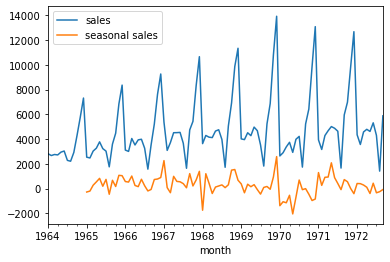

In [35]:
df.plot()                                  #####seasonal sales are at stationalry 

In [36]:
adfuller_test(df["seasonal sales"].dropna())            ##testiing with adfuller

adf test stat ....-7.626619157213163
pvalue ....2.060579696813685e-11
lags used ....0
no of observations ....92
its a stationary


In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [40]:
import statsmodels.api as sm

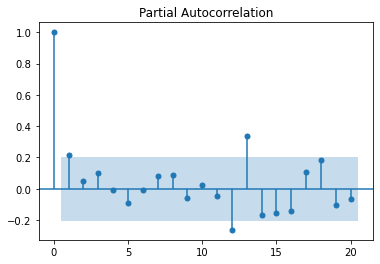

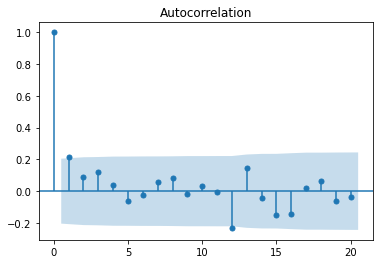

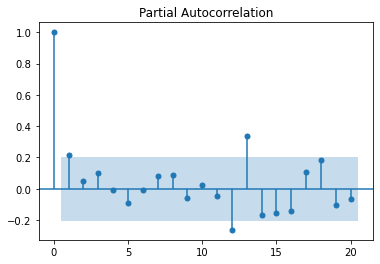

In [42]:
sm.graphics.tsa.plot_acf(df["seasonal sales"].iloc[13:])
sm.graphics.tsa.plot_pacf(df["seasonal sales"].iloc[13:])


In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
model=sm.tsa.statespace.SARIMAX(df["sales"],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [51]:
result=model.fit()

In [53]:
df["forecast"]=result.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='month'>

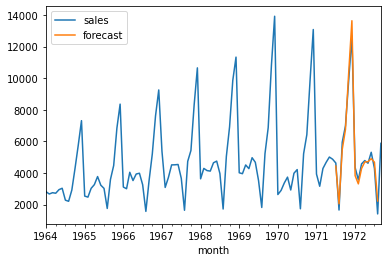

In [55]:
df[["sales","forecast"]].plot()

In [58]:
from pandas.tseries.offsets import DateOffset

In [62]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [63]:
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [67]:
future_df

,sales,seasonal sales,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [68]:
newdf=pd.concat([df,future_df])

In [85]:
newdf

,sales,seasonal sales,forecast,new
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,NaN,NaN
1964-03-01,2755.0,NaN,NaN,NaN
1964-04-01,2721.0,NaN,NaN,NaN
1964-05-01,2946.0,NaN,NaN,NaN
...,...,...,...,...
1974-04-01,NaN,NaN,5189.452971,5189.452971
1974-05-01,NaN,NaN,5119.495218,5119.495218
1974-06-01,NaN,NaN,5675.242496,5675.242496
1974-07-01,NaN,NaN,4726.202420,4726.202420


In [82]:
newdf["forecast"]=result.predict(start=104,end=128,dynamic=True)

<AxesSubplot:>

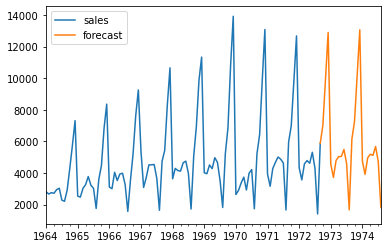

In [84]:
newdf[["sales","forecast"]].plot()